In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data_path = 'imdb_movies.csv'

data = pd.read_csv(data_path)
data

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [9]:
print("Dataset Shape:", data.shape)
print("\nSample Data:\n", data.head())


Dataset Shape: (10178, 12)

Sample Data:
                          names       date_x  score  \
0                    Creed III  03/02/2023    73.0   
1     Avatar: The Way of Water  12/15/2022    78.0   
2  The Super Mario Bros. Movie  04/05/2023    76.0   
3                      Mummies  01/05/2023    70.0   
4                    Supercell  03/17/2023    61.0   

                                           genre  \
0                                  Drama, Action   
1             Science Fiction, Adventure, Action   
2  Animation, Adventure, Family, Fantasy, Comedy   
3  Animation, Comedy, Family, Adventure, Fantasy   
4                                         Action   

                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always 

In [10]:
print("\nDataset Info:\n")
data.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [11]:
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
               score      budget_x       revenue
count  10178.000000  1.017800e+04  1.017800e+04
mean      63.497052  6.488238e+07  2.531401e+08
std       13.537012  5.707565e+07  2.777880e+08
min        0.000000  1.000000e+00  0.000000e+00
25%       59.000000  1.500000e+07  2.858898e+07
50%       65.000000  5.000000e+07  1.529349e+08
75%       71.000000  1.050000e+08  4.178021e+08
max      100.000000  4.600000e+08  2.923706e+09


In [12]:
print("\nColumns with Missing Values:")
missing_columns = data.columns[data.isnull().any()]
print(data[missing_columns].isnull().sum())


Columns with Missing Values:
genre    85
crew     56
dtype: int64


In [13]:
data['genre'] = data['genre'].fillna('Unknown')
data['crew'] = data['crew'].fillna('Not Available')


In [14]:
data['date_x'] = pd.to_datetime(data['date_x'], errors='coerce')

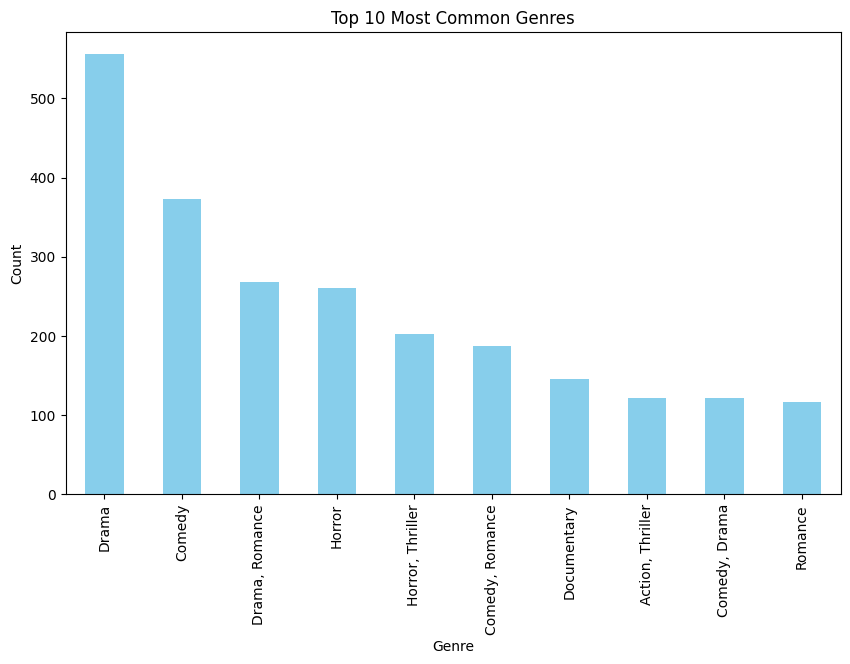

In [16]:
plt.figure(figsize=(10, 6))
genre_counts = data['genre'].value_counts().head(10)
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Runtime column not found in the dataset.


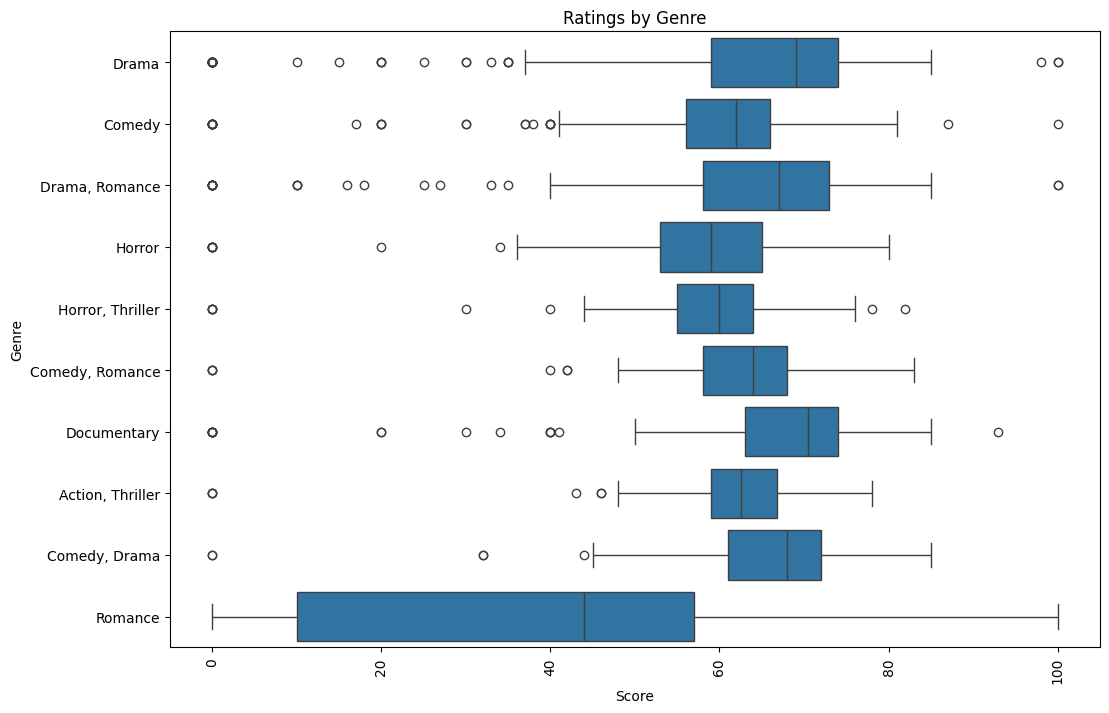

Votes column not found in the dataset.


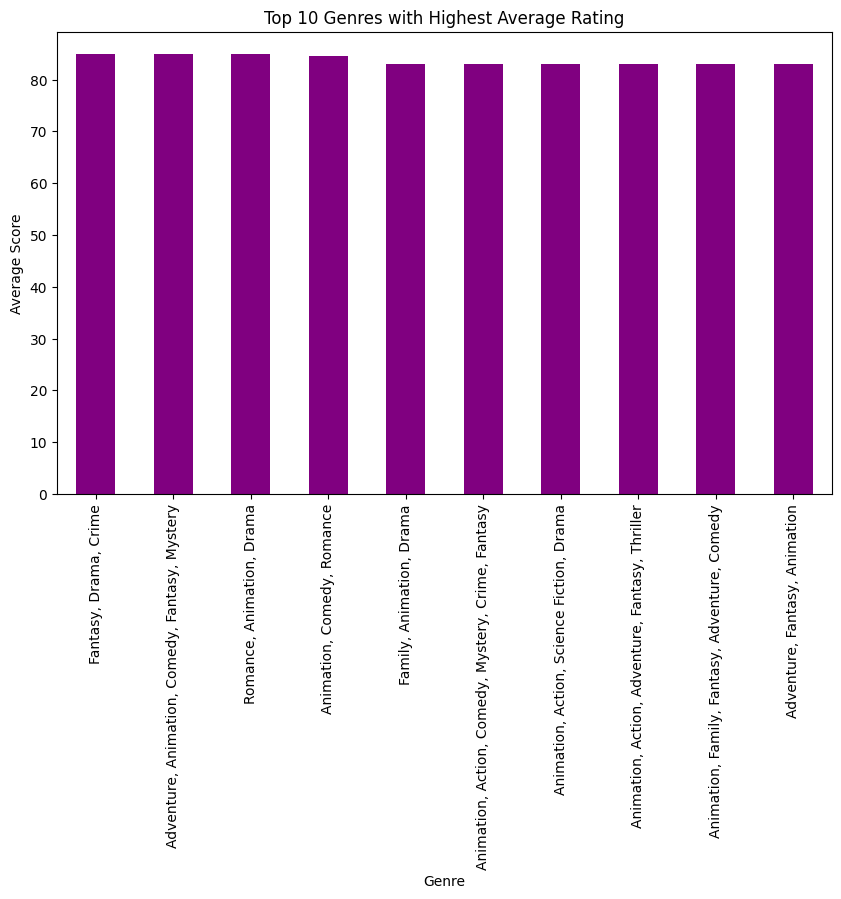

In [17]:
if 'runtime' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='runtime', y='score', data=data)
    plt.title('Runtime vs. Score')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Score')
    plt.show()
else:
    print("Runtime column not found in the dataset.")

# Ratings by genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='score', y='genre', data=data, order=genre_counts.index)
plt.title('Ratings by Genre')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.show()

# Correlation between votes and ratings (if available)
if 'votes' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='votes', y='score', data=data)
    plt.title('Votes vs. Score')
    plt.xlabel('Number of Votes')
    plt.ylabel('Score')
    plt.show()
    print("Correlation Coefficient:", data['votes'].corr(data['score']))
else:
    print("Votes column not found in the dataset.")

# Task 6: Genre-Specific Analysis
# Highest average rating by genre
genre_avg_rating = data.groupby('genre')['score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
genre_avg_rating.plot(kind='bar', color='purple')
plt.title('Top 10 Genres with Highest Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.show()


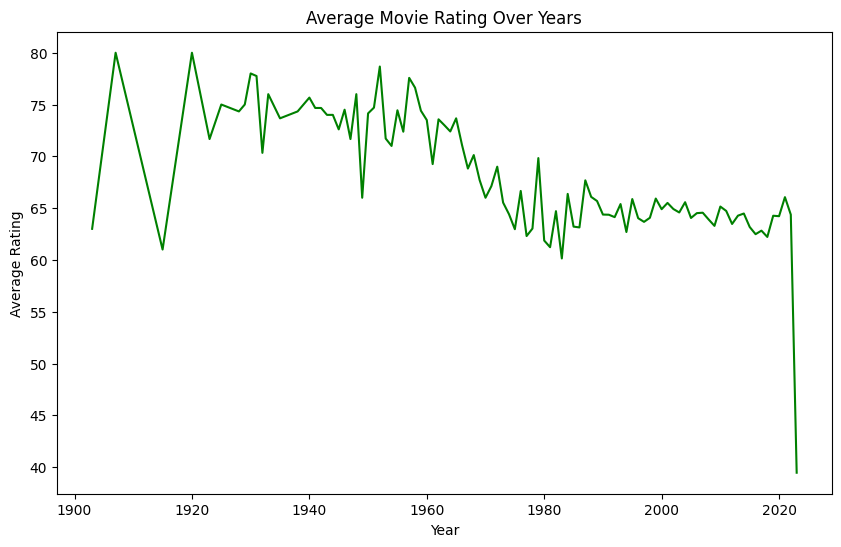

In [20]:
if 'date_x' in data.columns:
    plt.figure(figsize=(10, 6))
    avg_rating_year = data.groupby(data['date_x'].dt.year)['score'].mean()
    avg_rating_year.plot(color='green')
    plt.title('Average Movie Rating Over Years')
    plt.xlabel('Year')
    plt.ylabel('Average Rating')
    plt.show()


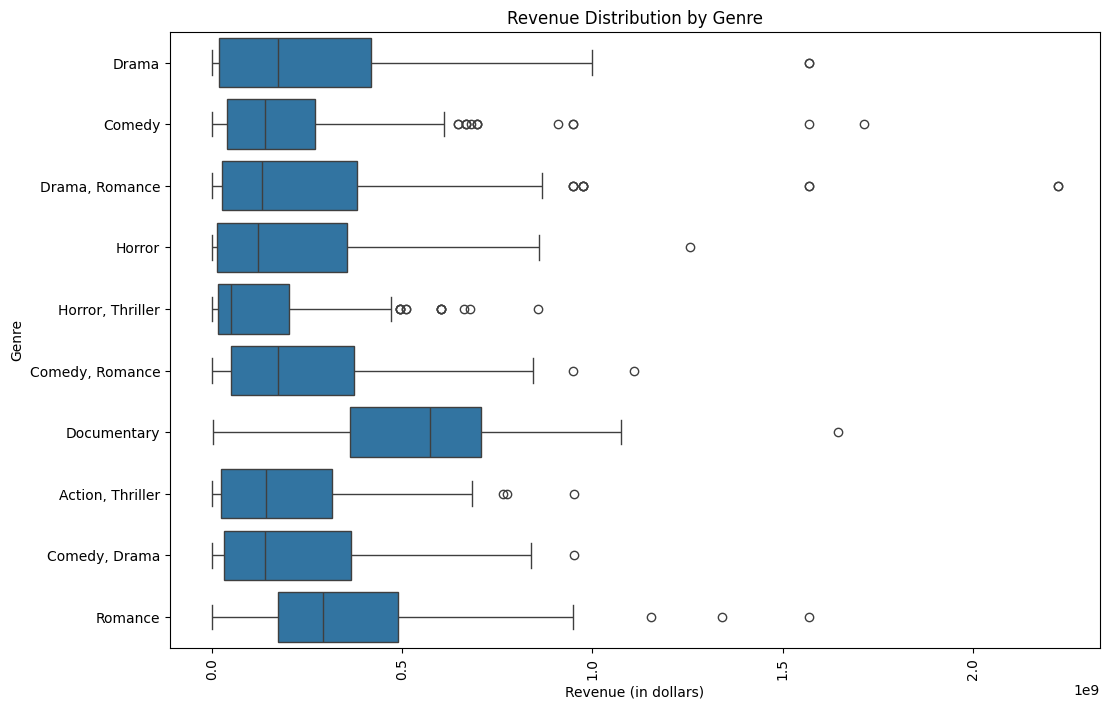

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='revenue', y='genre', data=data, order=genre_counts.index)
plt.title('Revenue Distribution by Genre')
plt.xlabel('Revenue (in dollars)')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.show()
